# DefiR : un notebook télépathique 

![](Telepathy.jpg)

## Utilisation rapide

Afin de réaliser le clustering, il faut spécifier : 

- N : le nombre de clusters voulus
- distance : le type de matrice de distance ("Euclidean" ou "Correlation")
- meth : l'algorithme de clustering : "KM" ou "HCL"

Ecriture de la fonction sous la forme : `defiR(df, <N>, "distance", "meth")`
    
*Exemple* `defiR(df, 50, "Correlation", "KM")`

## Récupérer les données et préparer l'analyse

La table de comptage a été uploadée dans un dossier partagé sur le cluster IFB

In [48]:
data = as.matrix(read.csv("cell-cycle_SCERE_DUO.txt", sep = "\t"))

On utilisera la fonction plotGenes2 fournie par Gaëlle

In [49]:
plotGenes2 <- function(expData, title = "", yMin = 0, yMax = NULL, meanProfile = TRUE){
  
  # Check function parameters
  if(is.null(yMax)){
    
    yMax = max(expData)
    
  }
  
  # Representation of the first expression profile
  plot(1:ncol(expData), expData[1,], col = "grey", type = "l",
       ylim = c(floor(yMin), ceiling(yMax)),
       xlab = "Time point", ylab = "Gene expression level",
       main = title)
  
  # Add expression profile for other genes
  for(i in 2:nrow(expData)){
    
    lines(1:ncol(expData), expData[i,], col = "grey")
    
    # end of for()  
  }
  
  # Average expression profile
  if(meanProfile == TRUE){
    expMean = apply(expData, 2, mean)
    lines(1:ncol(expData), expMean, col = "red", 
          lwd = 1.5, lty = "dashed")
  }
  
  # end of function plotGenes()  
}

Ainsi qu'une librairie spécifique pour les couleurs de la heatmap :

In [50]:
library(viridis)

## Fonction "Clustering" 

In [51]:
Clustering <- function(data, N, distance, meth) {
  
#-----------------------
## Calcul des matrices de distances
#-----------------------

if(distance == "Euclidean") {
    ## Calcul de matrices de distances euclidiennes
    matDist = dist(data[,])
    print("Matrice de distance par méthode euclidienne")
  } else if(distance == "Correlation") {
    ## Calcul de la matrice de distances de corrélation
    matDist = as.dist(1 - cor(t(data)))
    print("Matrice de distance par méthode de corrélation")
  }


#-----------------------
## Méthode d'analyse
#-----------------------

if(meth == "KM") {
  
    ## Method des k-means
    resKmeans <- kmeans(matDist, centers = N)
    
    cluster_all <- data.frame()
    
    for (i in seq (1,N)) {
        # Extraction du cluster
        cluster <- data[which(resKmeans$cluster == i),]
        # Incrémentation du tableau de données général
        cluster_all = rbind(cluster_all, cluster)
        # Profil d'expression des gènes
        plotGenes2(cluster)
    }
    
    print("Analyse par méthode des k-means")
    
  } else if(meth == "HCL") {
    
    ## Method des HCL
    resHCL = hclust(matDist)
    
    cluster_all = data.frame()
    
    for (i in seq (1,N)) {
        #Extraction du Cluster
        cluster <- data[which(cutree(resHCL, k = N) == i),]
        # Incrémentation du tableau de données général
        cluster_all = rbind(cluster_all, cluster)
        # Profil d'expression
        plotGenes2(cluster)
    }
    
    print("Analyse par méthode de HCL")
  }
return(cluster_all)    
    }

Pour lancer la fonction, il suffit de spécifier les arguments dans la commande ci-dessous: 

[1] "Matrice de distance par méthode de corrélation"


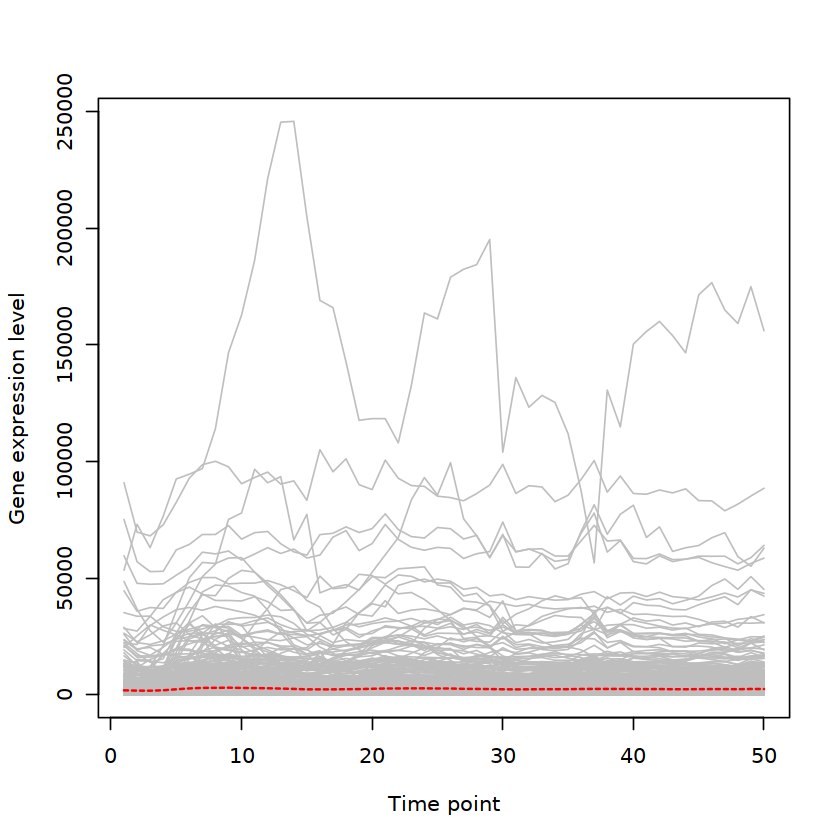

[1] "Analyse par méthode des k-means"


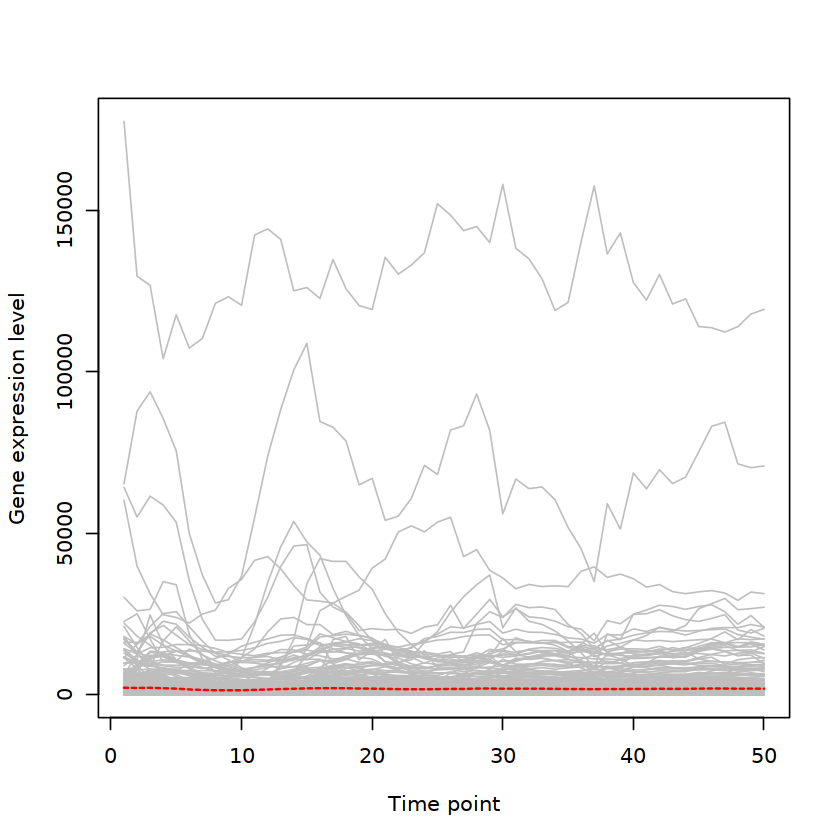

In [52]:
result_clustering=Clustering(data, 2, "Correlation", "KM")

## Heatmap

Il suffit ensuite de créer une heatmap pour visualiser nos résultats sous forme de cycle : 

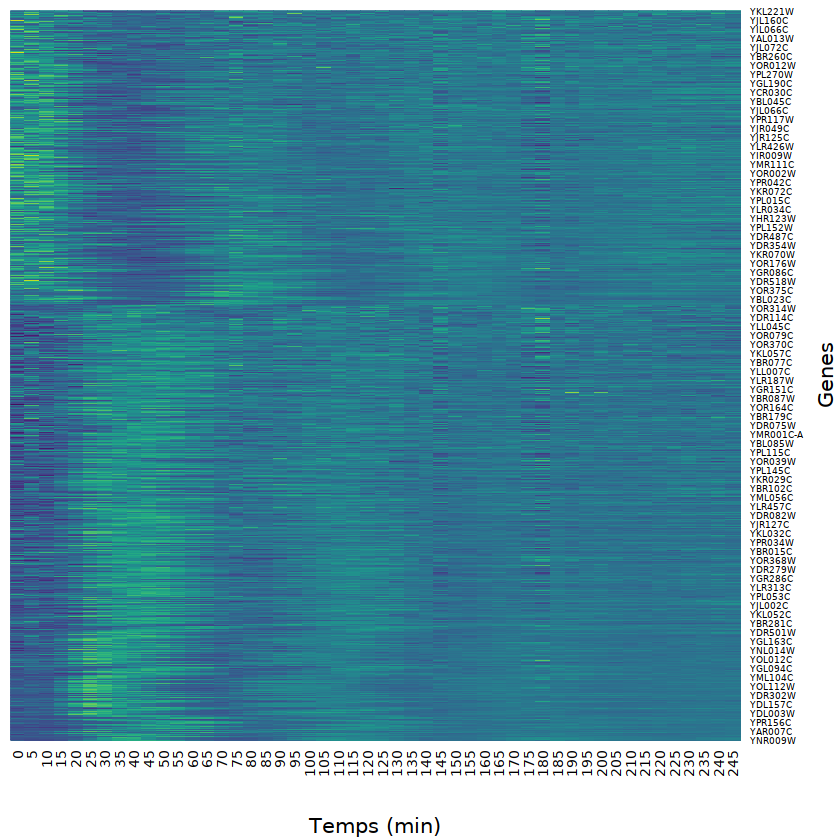

In [53]:
colnames(result_clustering) = c(seq(0,245,5))
heatmap(as.matrix(result_clustering), Colv = NA, Rowv = NA, scale="row", col = viridis(256), 
xlab = "Temps (min)", ylab = "Genes")

**Et voilà !**